# 07. Support Vector Machines (SVM)

**Author:** [Your Name/GitHub Username]
**Date:** June 3, 2025

## Introduction

Support Vector Machines (SVMs) are a powerful and versatile class of supervised machine learning algorithms used for **classification**, **regression**, and **outlier detection**. They are particularly effective in high-dimensional spaces and are well-suited for cases where the number of dimensions is greater than the number of samples.

The core idea behind SVM for classification is to find an optimal **hyperplane** in an N-dimensional space (where N is the number of features) that distinctly classifies the data points. The "optimal" hyperplane is the one that has the largest margin between the data points of different classes.

* **Type:** Supervised Learning
* **Task:** Primarily Classification, also Regression (SVR) and Outlier Detection
* **Goal:** To find the hyperplane that best separates the classes in the feature space, maximizing the margin between them.

## Theoretical Background

### 1. The Maximal Margin Classifier
For linearly separable data, SVM aims to find the hyperplane that maximizes the **margin**, which is the distance between the hyperplane and the closest data points (called **support vectors**) from either class.
* **Hyperplane:** A decision boundary that separates the data. In a 2D space, it's a line; in 3D, it's a plane; in higher dimensions, it's a hyperplane. It can be defined by the equation $w \cdot x - b = 0$, where $w$ is the weight vector (normal to the hyperplane) and $b$ is the bias term.
* **Margin:** The street or corridor between the two classes, defined by the support vectors. SVM tries to make this margin as wide as possible.
* **Support Vectors:** These are the data points that lie closest to the decision boundary (hyperplane). They are the critical elements of the training set because if they are removed or shifted, the position of the hyperplane would change. Other points do not affect the hyperplane.

### 2. Hard Margin vs. Soft Margin SVM
* **Hard Margin SVM:**
    * Assumes that the training data is perfectly linearly separable.
    * Aims to find a hyperplane that separates all data points without any misclassifications or points within the margin.
    * Very sensitive to outliers, as a single outlier can drastically change the hyperplane.
    * Not practical for most real-world datasets which often contain noise and overlapping classes.

* **Soft Margin SVM:**
    * Allows for some misclassifications or points to be within the margin to achieve a better overall fit and generalization. This is more robust to outliers and suitable for non-linearly separable data (to some extent, even before kernels).
    * Introduces a regularization parameter `C` (often called the penalty parameter or cost parameter):
        * `C` controls the trade-off between maximizing the margin and minimizing the classification error (or margin violations).
        * **Small `C`**: Wider margin, allowing more margin violations (more tolerant of misclassifications). Might lead to underfitting.
        * **Large `C`**: Narrower margin, penalizing margin violations more heavily (less tolerant of misclassifications). Might lead to overfitting.

### 3. The Kernel Trick (Handling Non-Linear Data)
Many real-world datasets are not linearly separable. SVMs can handle this using the **kernel trick**. The idea is to map the input data into a higher-dimensional feature space where it might become linearly separable. The kernel trick allows SVMs to operate in this high-dimensional space without explicitly computing the coordinates of the data in that space, but rather by computing dot products between images of pairs of data in that space.

* **Kernel Function ($K(x_i, x_j)$):** A function that computes the dot product of the transformed feature vectors $\phi(x_i) \cdot \phi(x_j)$ in the higher-dimensional space, without actually performing the transformation $\phi$.

Common Kernel Functions:
* **Linear Kernel:** $K(x_i, x_j) = x_i^T x_j$
    * This is equivalent to no transformation, resulting in a linear SVM.
* **Polynomial Kernel:** $K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$
    * Parameters: `degree (d)`, `gamma ($\gamma$)`, `coef0 (r)`.
    * Can model polynomial decision boundaries.
* **Radial Basis Function (RBF) Kernel:** $K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$
    * Parameter: `gamma ($\gamma$)`.
    * This is a very popular and flexible kernel, capable of creating complex, non-linear decision boundaries. It maps samples to an infinitely high-dimensional space.
    * **Small `gamma`**: The influence of a single training example reaches farther; decision boundary is smoother.
    * **Large `gamma`**: The influence is more localized; decision boundary can be more complex and wiggly, potentially overfitting.
* **Sigmoid Kernel:** $K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$
    * Parameters: `gamma ($\gamma$)`, `coef0 (r)`.

### 4. Support Vector Regression (SVR)
SVM can also be used for regression tasks. The goal of SVR is to find a hyperplane that best fits the data, but with a key difference: it tries to fit as many instances as possible *within* a specified margin (the $\epsilon$-insensitive tube) around the hyperplane, while limiting margin violations. Points outside this tube are penalized.

### Pros
* Effective in high-dimensional spaces (many features).
* Still effective in cases where number of dimensions is greater than the number of samples.
* Memory efficient as it uses a subset of training points in the decision function (support vectors).
* Versatile due to different kernel functions that can be specified.
* Can model non-linear decision boundaries.

### Cons
* Can be computationally intensive to train, especially with large datasets (complexity can be between $O(N_{samples}^2 N_{features})$ and $O(N_{samples}^3 N_{features})$).
* Choosing appropriate kernel functions and hyperparameters (like `C` and `gamma`) can be tricky and often requires careful tuning (e.g., via cross-validation).
* Less interpretable compared to models like Decision Trees or Logistic Regression; the meaning of coefficients in a high-dimensional kernel space is not straightforward.
* Performance can be sensitive to the choice of kernel and its parameters.

### Common Use Cases
* Image classification.
* Text categorization.
* Bioinformatics (e.g., protein classification, cancer classification).
* Handwriting recognition.
* Face detection.
* Financial forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap # For decision boundary plotting

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler # Crucial for SVMs
from sklearn.svm import SVC, SVR # Support Vector Classifier and Regressor
from sklearn import metrics # For accuracy, confusion matrix, classification report

# Set a style for seaborn plots
sns.set_style('whitegrid')

## Implementation with Python (Classification)

We'll start by using a synthetic dataset (`make_circles`) that is not linearly separable to demonstrate the power of kernels. Then, we might use the Iris dataset for a multi-class example.

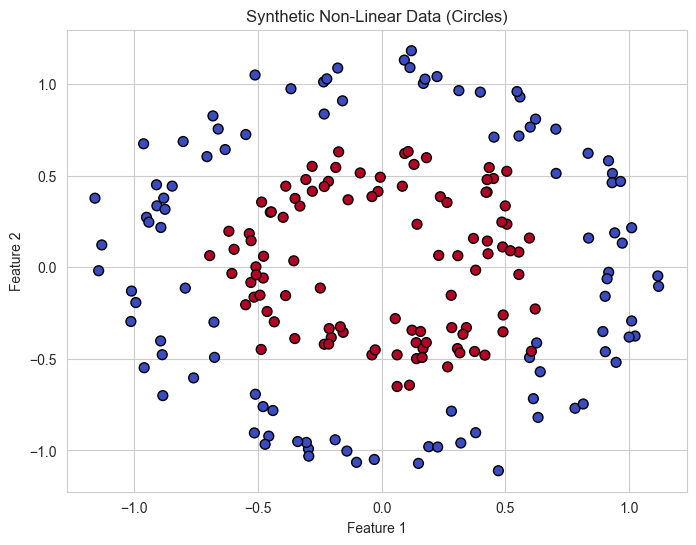

In [3]:
from sklearn.datasets import make_circles, make_blobs

# Generate non-linearly separable data (circles)
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# Convert to DataFrame for consistency (optional)
X_circles_df = pd.DataFrame(X_circles, columns=['Feature1', 'Feature2'])
y_circles_s = pd.Series(y_circles, name='Target')

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_circles_df['Feature1'], X_circles_df['Feature2'], c=y_circles_s, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Synthetic Non-Linear Data (Circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

This dataset clearly cannot be separated by a single straight line.

In [4]:
# 1. Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles_df, y_circles_s, test_size=0.3, random_state=42, stratify=y_circles_s)

print(f"Training set size: {X_train_c.shape[0]}")
print(f"Testing set size: {X_test_c.shape[0]}")

# 2. Feature Scaling (CRUCIAL for SVMs, especially with RBF kernel)
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Convert scaled arrays back to DataFrames (optional, for inspection)
# X_train_c_scaled_df = pd.DataFrame(X_train_c_scaled, columns=X_circles_df.columns)
# X_test_c_scaled_df = pd.DataFrame(X_test_c_scaled, columns=X_circles_df.columns)

Training set size: 140
Testing set size: 60


### Training SVM with Different Kernels
Let's try a linear kernel first, then an RBF kernel.

In [5]:
# --- 1. Linear Kernel ---
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_c_scaled, y_train_c)
y_pred_linear = svm_linear.predict(X_test_c_scaled)
accuracy_linear = metrics.accuracy_score(y_test_c, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear:.4f}")

# --- 2. RBF Kernel ---
# Common parameters for RBF: C and gamma
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # 'scale' is a good default for gamma
svm_rbf.fit(X_train_c_scaled, y_train_c)
y_pred_rbf = svm_rbf.predict(X_test_c_scaled)
accuracy_rbf = metrics.accuracy_score(y_test_c, y_pred_rbf)
print(f"Accuracy with RBF Kernel (C=1.0, gamma='scale'): {accuracy_rbf:.4f}")

# --- 3. Polynomial Kernel ---
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train_c_scaled, y_train_c)
y_pred_poly = svm_poly.predict(X_test_c_scaled)
accuracy_poly = metrics.accuracy_score(y_test_c, y_pred_poly)
print(f"Accuracy with Polynomial Kernel (degree=3): {accuracy_poly:.4f}")

Accuracy with Linear Kernel: 0.5000
Accuracy with RBF Kernel (C=1.0, gamma='scale'): 1.0000
Accuracy with Polynomial Kernel (degree=3): 0.6667


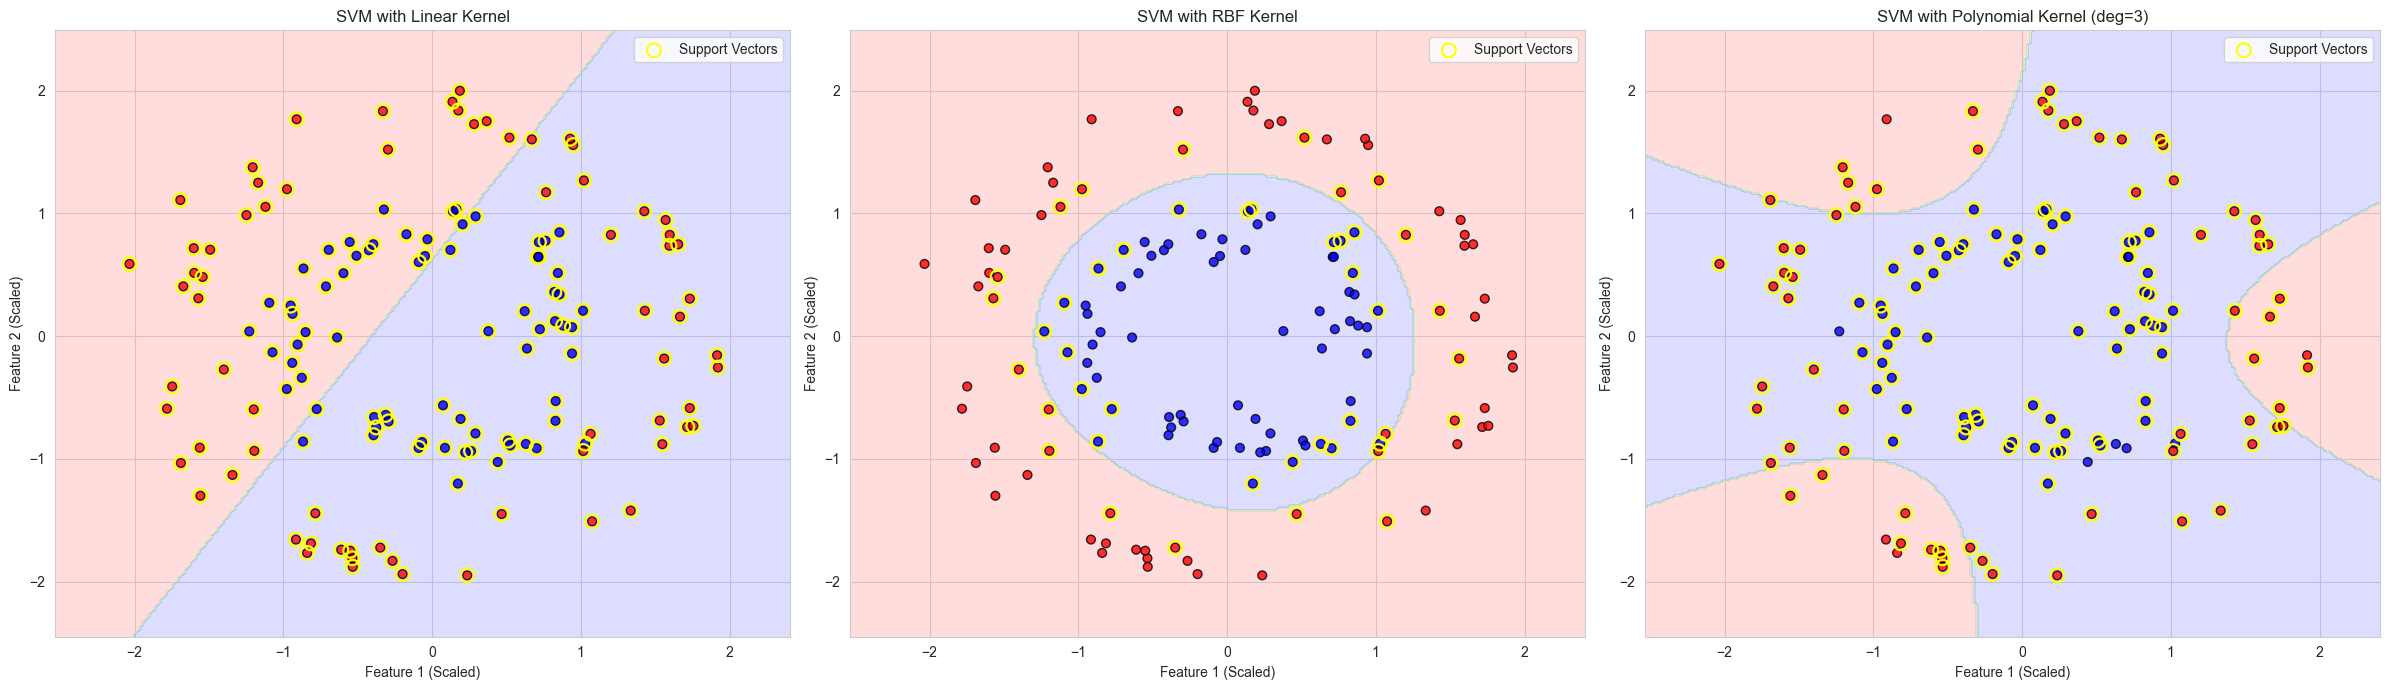

In [6]:
def plot_decision_boundaries_svm(X_scaled, y_data, model, scaler_obj, title, ax):
    # Ensure X_scaled is a NumPy array
    X_np = X_scaled if isinstance(X_scaled, np.ndarray) else X_scaled.values
    y_np = y_data if isinstance(y_data, np.ndarray) else y_data.values

    # Create a mesh to plot in
    # Inverse transform mesh to plot on original scale, or plot on scaled scale
    # For simplicity, let's create mesh on scaled data range
    x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
    y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    mesh_points_scaled = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points_scaled)
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    custom_cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # For regions
    custom_cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) # For points
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=custom_cmap_light)
    
    # Plot data points (use original unscaled data for plotting, but transform for prediction if needed)
    # Here, we plot the scaled data points used for training/testing the boundary.
    ax.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=custom_cmap_bold, edgecolor='k', s=40, alpha=0.8)
    
    # Plot support vectors
    if hasattr(model, "support_vectors_"):
        sv = model.support_vectors_ # These are already scaled if model was fit on scaled data
        ax.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='yellow', linewidths=1.5, label='Support Vectors')
        ax.legend()

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('Feature 1 (Scaled)')
    ax.set_ylabel('Feature 2 (Scaled)')

fig, axes = plt.subplots(1, 3, figsize=(24, 7))
plot_decision_boundaries_svm(X_train_c_scaled, y_train_c, svm_linear, scaler_c, 'SVM with Linear Kernel', axes[0])
plot_decision_boundaries_svm(X_train_c_scaled, y_train_c, svm_rbf, scaler_c, 'SVM with RBF Kernel', axes[1])
plot_decision_boundaries_svm(X_train_c_scaled, y_train_c, svm_poly, scaler_c, 'SVM with Polynomial Kernel (deg=3)', axes[2])
plt.tight_layout()
plt.show()

The plots demonstrate how different kernels create different decision boundaries. The RBF kernel is clearly able to separate the circular data, and the yellow circles highlight the support vectors.

### Detailed Evaluation for RBF Kernel SVM

Evaluating RBF Kernel SVM (C=1.0, gamma=scale) on Test Set:
Accuracy: 1.0000


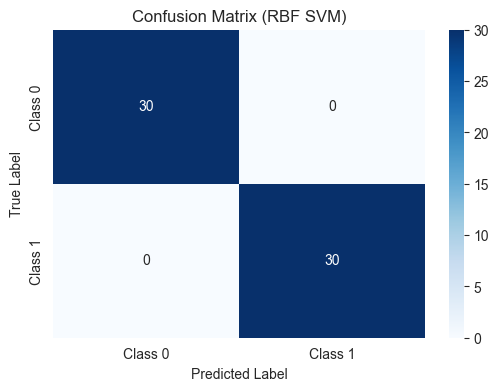


Classification Report (RBF SVM):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        30
     Class 1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [7]:
print(f"Evaluating RBF Kernel SVM (C={svm_rbf.C}, gamma={svm_rbf.gamma}) on Test Set:")
# 1. Accuracy (already calculated as accuracy_rbf)
print(f"Accuracy: {accuracy_rbf:.4f}")

# 2. Confusion Matrix
cm_rbf = metrics.confusion_matrix(y_test_c, y_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (RBF SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Classification Report
class_report_rbf = metrics.classification_report(y_test_c, y_pred_rbf, target_names=['Class 0', 'Class 1'])
print("\nClassification Report (RBF SVM):")
print(class_report_rbf)

## Hyperparameter Tuning (Brief for RBF Kernel)

The parameters `C` (regularization) and `gamma` (kernel coefficient for RBF) are crucial for SVM performance.
* **`C`**: Trades off correct classification of training examples against maximization of the decision function's margin.
* **`gamma`**: Defines how much influence a single training example has. Large gamma means a closer reach, small gamma means a farther reach.

We can use `GridSearchCV` to find good combinations.

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters found by GridSearchCV (RBF):
{'C': 1, 'gamma': 'scale'}
Best Cross-Validated Accuracy: 0.9787
Test Set Accuracy with Best RBF SVM: 1.0000


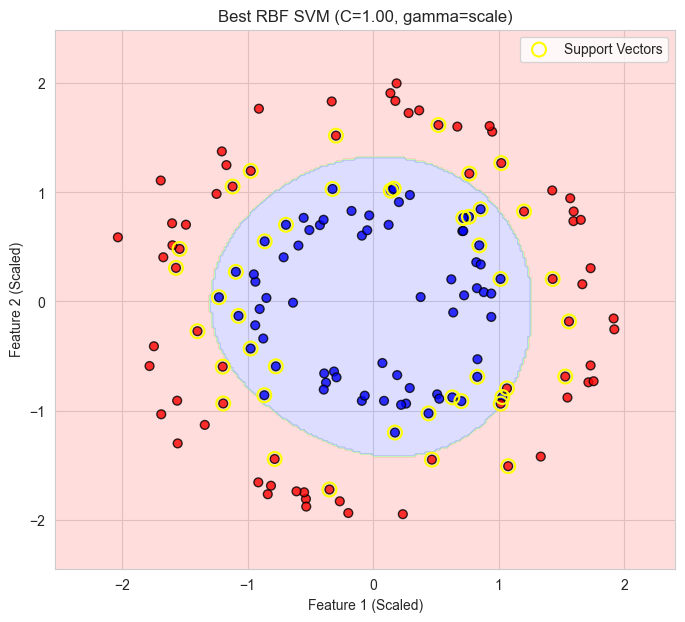

In [8]:
# Define parameter grid
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1] # 'scale' is 1 / (n_features * X.var())
}

# Create GridSearchCV object
# Using a smaller subset of data for faster grid search demo if needed
# For now, use X_train_c_scaled, y_train_c
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_rbf, cv=3, verbose=1, scoring='accuracy')
grid_search_rbf.fit(X_train_c_scaled, y_train_c)

# Best parameters and best score
print("\nBest Parameters found by GridSearchCV (RBF):")
print(grid_search_rbf.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search_rbf.best_score_:.4f}")

# Evaluate the best model found by grid search on the test set
best_svm_rbf = grid_search_rbf.best_estimator_
y_pred_best_rbf = best_svm_rbf.predict(X_test_c_scaled)
accuracy_best_rbf = metrics.accuracy_score(y_test_c, y_pred_best_rbf)
print(f"Test Set Accuracy with Best RBF SVM: {accuracy_best_rbf:.4f}")

# Visualize the best RBF model
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
plot_decision_boundaries_svm(X_train_c_scaled, y_train_c, best_svm_rbf, scaler_c, f'Best RBF SVM (C={best_svm_rbf.C:.2f}, gamma={best_svm_rbf.gamma})', ax)
plt.show()

### SVM for Multi-class Classification (Brief with Iris Dataset)
Scikit-learn's `SVC` implements the "one-vs-one" approach for multi-class classification by default (it constructs $k(k-1)/2$ classifiers where $k$ is the number of classes). It can also do "one-vs-rest" if specified.

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

svm_iris = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42) # 'ovr' or 'ovo'
svm_iris.fit(X_train_iris_scaled, y_train_iris)
y_pred_iris = svm_iris.predict(X_test_iris_scaled)
accuracy_iris = metrics.accuracy_score(y_test_iris, y_pred_iris)

print(f"\nAccuracy of RBF SVM on Iris (multi-class): {accuracy_iris:.4f}")
print("\nClassification Report for Iris SVM:")
print(metrics.classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))


Accuracy of RBF SVM on Iris (multi-class): 0.9333

Classification Report for Iris SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## Support Vector Regression (SVR) (Brief Example)

SVR aims to fit a function $f(x)$ such that the residuals $y_i - f(x_i)$ are small. It uses an $\epsilon$-insensitive loss function, meaning errors smaller than $\epsilon$ are not penalized. The goal is to fit as many instances as possible within an $\epsilon$-tube around the function.


SVR (RBF Kernel) Evaluation:
Mean Squared Error (MSE): 0.4799
R-squared (R²): 0.1124


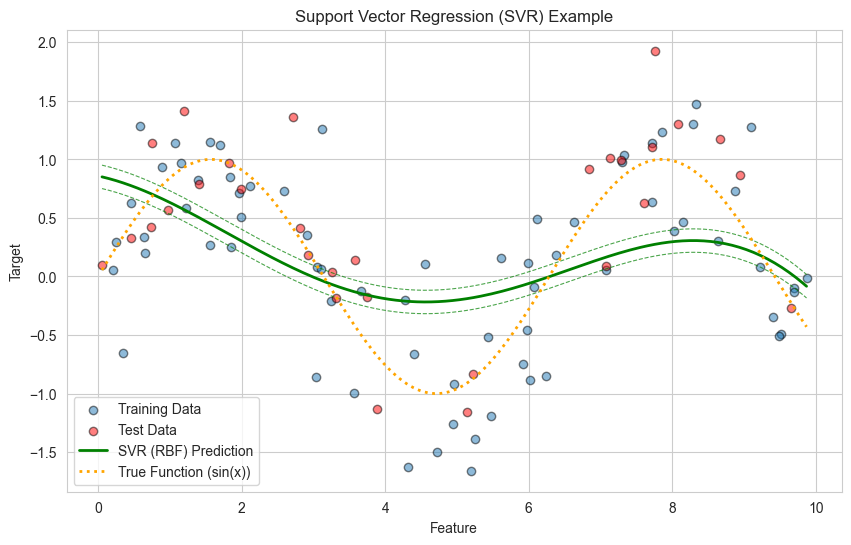

In [10]:
# Generate some simple 1D synthetic data for regression
np.random.seed(42)
X_reg = np.sort(10 * np.random.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.randn(100) * 0.5 # sin(x) + noise

# Split data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Feature scaling (still important!)
scaler_reg_x = StandardScaler()
X_reg_train_scaled = scaler_reg_x.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg_x.transform(X_reg_test)
# Note: Target variable y_reg is usually NOT scaled for SVR in scikit-learn unless specifically needed.

# SVR model
# Epsilon (ε) defines the width of the tube. C is the regularization parameter.
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_reg_train_scaled, y_reg_train)

# Predictions
y_reg_pred = svr_rbf.predict(X_reg_test_scaled)

# Evaluation
mse_svr = metrics.mean_squared_error(y_reg_test, y_reg_pred)
r2_svr = metrics.r2_score(y_reg_test, y_reg_pred)
print(f"\nSVR (RBF Kernel) Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"R-squared (R²): {r2_svr:.4f}")

# Plotting the results
# Create points for plotting the regression line
X_plot_reg = np.linspace(X_reg.min(), X_reg.max(), 200).reshape(-1, 1)
X_plot_reg_scaled = scaler_reg_x.transform(X_plot_reg)
y_plot_pred_svr = svr_rbf.predict(X_plot_reg_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg_train, y_reg_train, alpha=0.5, edgecolor='k', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, color='red', alpha=0.5, edgecolor='k', label='Test Data')
plt.plot(X_plot_reg, y_plot_pred_svr, color='green', linewidth=2, label=f'SVR (RBF) Prediction')
# Plot the epsilon-tube (conceptual)
plt.plot(X_plot_reg, y_plot_pred_svr + svr_rbf.epsilon, color='green', linestyle='--', linewidth=0.8, alpha=0.7)
plt.plot(X_plot_reg, y_plot_pred_svr - svr_rbf.epsilon, color='green', linestyle='--', linewidth=0.8, alpha=0.7)
plt.plot(X_plot_reg, np.sin(X_plot_reg), color='orange', linestyle=':', linewidth=2, label='True Function (sin(x))')
plt.title('Support Vector Regression (SVR) Example')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## Conclusion & Key Takeaways

* Support Vector Machines (SVMs) are powerful models that find an optimal separating hyperplane by maximizing the margin between classes.
* **Support Vectors** are the critical data points lying on or closest to the margin boundaries.
* **Feature Scaling is crucial** for SVMs to ensure that features with larger magnitudes don't dominate the distance calculations.
* The **Kernel Trick** (using kernels like Linear, Polynomial, RBF, Sigmoid) allows SVMs to effectively model non-linear decision boundaries by implicitly mapping data to higher-dimensional spaces.
* Key hyperparameters include:
    * **`C` (Regularization parameter):** Balances margin maximization and misclassification penalty.
    * **`kernel`**: Type of kernel to use.
    * **`gamma` (for RBF, Poly, Sigmoid kernels):** Influences the "reach" of a single training example.
    * **`degree` (for Polynomial kernel).**
* SVMs can perform multi-class classification (e.g., using one-vs-one or one-vs-rest strategies).
* **Support Vector Regression (SVR)** adapts SVM principles for regression tasks, aiming to fit data within an $\epsilon$-insensitive tube.
* While powerful, SVMs can be computationally intensive for very large datasets and require careful hyperparameter tuning.

## Further Reading/References (Optional)

* [Scikit-learn SVC Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Scikit-learn SVR Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* Chapter on Support Vector Machines in "An Introduction to Statistical Learning" by James, Witten, Hastie, and Tibshirani.
* "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman for a more in-depth treatment.
* StatQuest: Support Vector Machines, Clearly Explained.